# Exercise: Working with DateTime Variables
In this task, you will work with **date and time data** in Pandas. The data set used contains counts of cyclists at various time intervals and locations in Munich. The data set contains the following variables:
- `“datum”` = date
- `“uhrzeit_start”` = start of the measurement interval
- `“uhrzeit_ende”` = end of the measurement interval
- `“richtung_1”` = direction of travel 1 of the cyclist
- `“richtung_2”` = direction of travel 2 of the cyclist
- `“total”` = total number of cyclists in a time interval

In [139]:
import pandas as pd

df = pd.read_csv('rad_15min_condensed.csv')
df.head()

,datum,uhrzeit_start,uhrzeit_ende,zaehlstelle,richtung_1,richtung_2,gesamt
0,2022.11.01,06:15,06:30,Kreuther,0.0,0.0,0.0
1,2022.11.01,06:15,06:30,Margareten,3.0,1.0,4.0
2,2022.11.01,06:15,06:30,Olympia,0.0,0.0,0.0
3,2022.11.01,06:30,06:45,Arnulf,6.0,0.0,6.0
4,2022.11.01,06:30,06:45,Erhardt,1.0,1.0,2.0


## Task 1
**Creating Time Variables**
- Use the columns **`datum` (date)** and **`uhrzeit_start` (start time)** to create a new column called **`datetime_start`**.
- Similarly, combine **`datum` (date)** and **`uhrzeit_ende` (end time)** into a new **`datetime_end`** column.
- Make sure that the variables is in the correct **datetime format**.
- After successfully creating `datetime_start` and `datetime_end`, **remove the original columns** (`datum`, `uhrzeit_start`, and `uhrzeit_ende`) from the dataset.

In [140]:
df["datetime_start"] = df["datum"] + df["uhrzeit_start"]
df["datetime_end"] = df["datum"] + df["uhrzeit_ende"]

In [142]:
df["datetime_start"] = pd.to_datetime(df["datetime_start"], format="%Y.%m.%d%H:%M")
df["datetime_end"] = pd.to_datetime(df["datetime_end"], format="%Y.%m.%d%H:%M")
df.head()

,datum,uhrzeit_start,uhrzeit_ende,zaehlstelle,richtung_1,richtung_2,gesamt,datetime_start,datetime_end
0,2022.11.01,06:15,06:30,Kreuther,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00
1,2022.11.01,06:15,06:30,Margareten,3.0,1.0,4.0,2022-11-01 06:15:00,2022-11-01 06:30:00
2,2022.11.01,06:15,06:30,Olympia,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00
3,2022.11.01,06:30,06:45,Arnulf,6.0,0.0,6.0,2022-11-01 06:30:00,2022-11-01 06:45:00
4,2022.11.01,06:30,06:45,Erhardt,1.0,1.0,2.0,2022-11-01 06:30:00,2022-11-01 06:45:00


In [143]:
df = df.drop(["datum", "uhrzeit_start", "uhrzeit_ende"], axis=1)
df.head()

,zaehlstelle,richtung_1,richtung_2,gesamt,datetime_start,datetime_end
0,Kreuther,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00
1,Margareten,3.0,1.0,4.0,2022-11-01 06:15:00,2022-11-01 06:30:00
2,Olympia,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00
3,Arnulf,6.0,0.0,6.0,2022-11-01 06:30:00,2022-11-01 06:45:00
4,Erhardt,1.0,1.0,2.0,2022-11-01 06:30:00,2022-11-01 06:45:00


## Task 2
In this task, you will analyze time-based trends in cycling data: determine **the peak hour for each counting station ("zaehlstelle")** based on the total number of cyclists recorded. Your result should be a dataframe showing:
 - The **counting station (`zaehlstelle`)**  
  - The **peak hour (`peakhour`)**  
  - The **total number of cyclists during that peak hour (`total_cyclists_peakhour`)**  



In [32]:
df["datetime_start"].dt.hour

0          6
1          6
2          6
3          6
4          6
          ..
399995    23
399996    23
399997    23
399998    23
399999    23
Name: datetime_start, Length: 400000, dtype: int32


In [144]:
#Adding a column with the starting hour of each row
df["hour"] = df["datetime_start"].dt.hour
df.head()

,zaehlstelle,richtung_1,richtung_2,gesamt,datetime_start,datetime_end,hour
0,Kreuther,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6
1,Margareten,3.0,1.0,4.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6
2,Olympia,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6
3,Arnulf,6.0,0.0,6.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6
4,Erhardt,1.0,1.0,2.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6


In [145]:
cyclists_ph = df.groupby(["zaehlstelle", "hour"])["gesamt"].sum().reset_index()
cyclists_ph

,zaehlstelle,hour,gesamt
0,Arnulf,0,7440.0
1,Arnulf,1,4002.0
2,Arnulf,2,2866.0
3,Arnulf,3,2302.0
4,Arnulf,4,3748.0
...,...,...,...
139,Olympia,19,123132.0
140,Olympia,20,94387.0
141,Olympia,21,64610.0
142,Olympia,22,46509.0


In [146]:
#Use loc to extract the rows where the "gesamt" is highest with idxmax
df_peak = cyclists_ph.loc[cyclists_ph.groupby("zaehlstelle")["gesamt"].idxmax()].reset_index(drop=True)
df_peak

,zaehlstelle,hour,gesamt
0,Arnulf,8,97928.0
1,Erhardt,18,314197.0
2,Hirsch,8,148568.0
3,Kreuther,7,15395.0
4,Margareten,17,160978.0
5,Olympia,18,166817.0


In [147]:
df_peak = df_peak.rename(columns={"hour": "peakhour", "gesamt": "total_cyclists_peakhour"})
df_peak

,zaehlstelle,peakhour,total_cyclists_peakhour
0,Arnulf,8,97928.0
1,Erhardt,18,314197.0
2,Hirsch,8,148568.0
3,Kreuther,7,15395.0
4,Margareten,17,160978.0
5,Olympia,18,166817.0


## Task 3
Analyze the dataset to determine whether the number of cyclists follows a **trend** or exhibits **seasonal patterns**.

1. **Trend Analysis**
Investigate if the cyclist count follows an increasing or decreasing trend.
- Compute a **7-day moving average** to smooth out short-term fluctuations.
- Plot both the **original data** and the **moving average**.

2. **Apply Differencing to Remove Trends**
- Compute the **first-order difference** of the data.
- Plot the differenced data and analyze whether the trend is removed.

3. **Compute ACF & PACF**
- **Autocorrelation Function (ACF):** Detect repeating cycles (e.g., daily or weekly patterns).
- **Partial Autocorrelation Function (PACF):** Identify significant lags that influence future values.

**Questions for Analysis**
- **Do you observe a clear trend in the cyclist count over time?**  
- **Is there a repeating pattern in the data?**  
- **What do the ACF/PACF plots suggest about seasonal effects?**  


### Trend Analysis

In [149]:
#A 7-day period is equivalent to 3878 rows of data
df["rolling_avg"] = df["gesamt"].rolling(window=3878, min_periods=1).mean()
df.head()

,zaehlstelle,richtung_1,richtung_2,gesamt,datetime_start,datetime_end,hour,rolling_avg
0,Kreuther,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6,0.000000
1,Margareten,3.0,1.0,4.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6,2.000000
2,Olympia,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6,1.333333
3,Arnulf,6.0,0.0,6.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6,2.500000
4,Erhardt,1.0,1.0,2.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6,2.400000


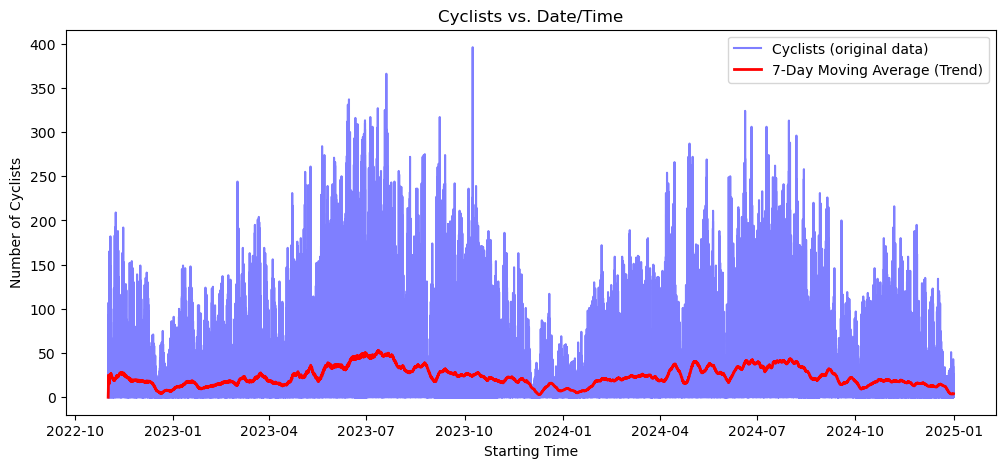

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df["datetime_start"], df["gesamt"], label="Cyclists (original data)", color="blue", alpha=0.5)
plt.plot(df["datetime_start"], df["rolling_avg"], label="7-Day Moving Average (Trend)", color="red", linewidth=2)
plt.xlabel("Starting Time")
plt.ylabel("Number of Cyclists")
plt.title("Cyclists vs. Date/Time")
plt.legend()
plt.show()

#### Interpretation
A seasonal trend is clearly visible in the original data. The number of cyclists peaks in the warmer months (July). The number of cyclists is lowest in Winter, around December/January. This movement repeats in each of the recorded years. The seasonal trends (i.e. peaks and lows) are still visible in the rolling average line. However, they are not as distinct as in the original data.

### Applying Differencing to Remove Trends

In [116]:
#Creating a dataset where one row represents the total cyclists on one day
df_daily = df.groupby(df["datetime_start"].dt.date)["gesamt"].sum().reset_index()
df_daily.head()

,datetime_start,gesamt
0,2022-11-01,8497.0
1,2022-11-02,16116.0
2,2022-11-03,16688.0
3,2022-11-04,7826.0
4,2022-11-05,6245.0


In [117]:
df_daily["1st Order Difference"] = df_daily["gesamt"].diff()

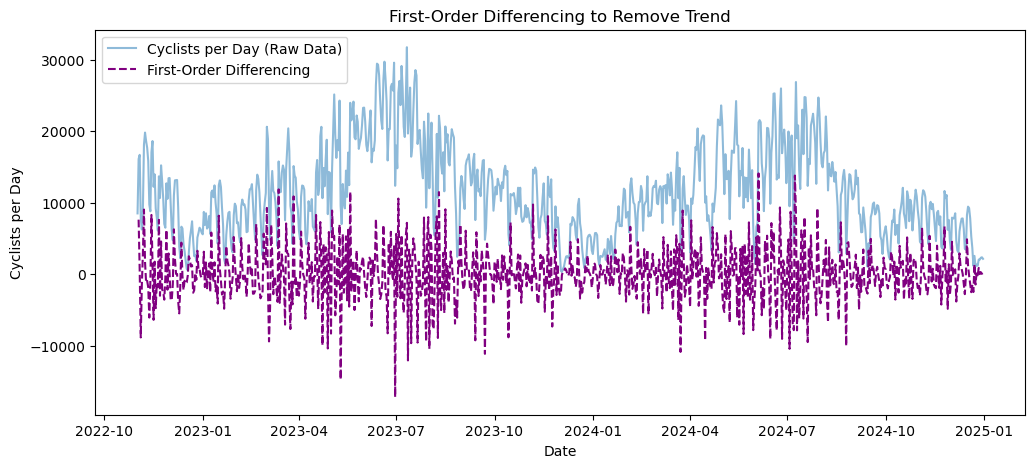

In [118]:
plt.figure(figsize=(12, 5))
plt.plot(df_daily["datetime_start"], df_daily["gesamt"], label="Cyclists per Day (Raw Data)", alpha=0.5)
plt.plot(df_daily["datetime_start"], df_daily["1st Order Difference"], label="First-Order Differencing", color="purple", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Cyclists per Day")
plt.title("First-Order Differencing to Remove Trend")
plt.legend()
plt.show()

#### Interpretation
The seasonal trend from the original is clearly visible with peaks in summer and dips in winter. The trend repeats yearly.
The dashed line for First Order Differencing mostly moves around 0 meaning that there is only a small change in the number of cyclists compared to the previous day. Thus, the trend has been diminished, but non completely removed, as there are still peaks and dips that are slightly visible.

### Computing ACF

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<Figure size 1400x800 with 0 Axes>

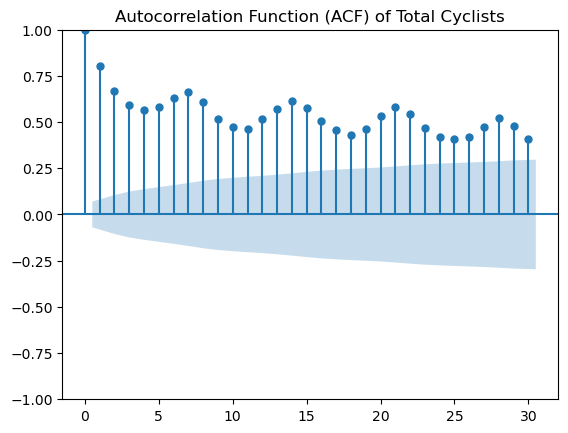

In [137]:
plt.figure(figsize=(14, 8))
plot_acf(df_daily["gesamt"], lags=30)  # 30 lags to check monthly correlation
plt.title("Autocorrelation Function (ACF) of Total Cyclists")
plt.show()

#### Interpretation ACF
At lag 1 there is high correlation to the day before.
The correlation to the days before is always at least 0.4 or much higher, which means that the number of cyclists is dependent on how many cyclists were there the day before.
There is a cyclical pattern (ups and downs) repeating approximately every 7 days. Numbers of cyclists on a certain weekday seem to be similar.
The correlation declines slightly over time, which could indicate a seasonal trend.
All the lags are statistically significant as they are not in the confidence interval, meaning that the autocorrelation is not just random.

### Computing PACF

<Figure size 1200x500 with 0 Axes>

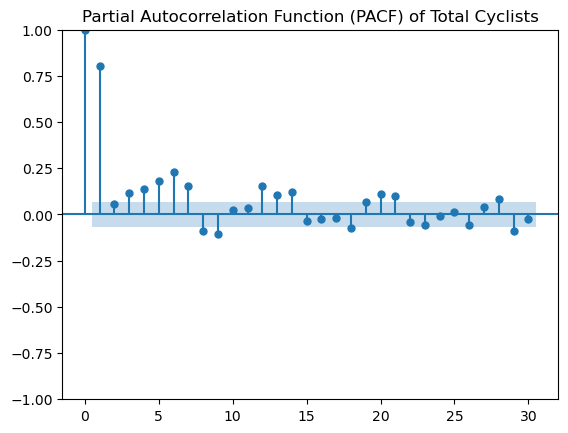

In [152]:
plt.figure(figsize=(12, 5))
plot_pacf(df_daily["gesamt"], lags=30)  
plt.title("Partial Autocorrelation Function (PACF) of Total Cyclists")
plt.show()

#### Interpretation PACF
Lag 1 has a high correlation, meaning that the previous day has the strongest influence on the number of cyclists today. Until lag 10 there is small correlation, so there is still a effect on the number of cyclists but not as strong as the day before. After 10 lags, most of the lags are not statistically significant, suggesting that there is no significant predictive effect beyond 10 days. There are peaks at 7, 14, 21 days which indicate a weekly cycle, meaning that there is a similar number of cyclists on each specific weekday.